# Finding missing values

Missing values are everywhere, and you don't want them interfering with your work. Some functions ignore missing data by default, but that's not always the behavior you might want. Some functions can't handle missing values at all, so these values need to be taken care of before you can use them. If you don't know where your missing values are, or if they exist, you could make mistakes in your analysis. In this exercise, you'll determine if there are missing values in the dataset, and if so, how many.


* Print a DataFrame that shows whether each value in avocados_2016 is missing or not.
* Print a summary that shows whether any value in each column is missing or not.
* Create a bar plot of the total number of missing values in each column.

In [1]:
import pandas as pd

avocados_sales = pd.read_csv("/kaggle/input/avocado-sales/avocado_clean.csv", index_col = 0)
avocados_sales.head()

,Date,AveragePrice,Total Avocados,Small 4046,Extra Large 4770,Large 4225,Total Bags,Small Bags,Large Bags,XLarge Bags,type,Cities
Sale ID,,,,,,,,,,,,
1,2017-03-05 00:00:00,$0.44,4973,224,0,4749,59085,639,58446,0,organic,Cincinnati Dayton
1,2017-02-05 00:00:00,$0.46,1750185,1200633,18325,531227,450366,113752,330583,6031,conventional,Phoenix Tucson
1,2017-03-05 00:00:00,$0.48,4857,718,0,4139,46034,1385,44649,0,organic,Detroit
1,2017-02-26 00:00:00,$0.49,4726,253,0,4473,39299,600,38699,0,organic,Cincinnati Dayton
1,2015-12-27 00:00:00,$0.49,1036815,738315,11642,286858,100892,70749,30143,0,conventional,Phoenix Tucson


          Date  AveragePrice  Total Avocados  Small 4046  Extra Large 4770  \
Sale ID                                                                      
1        False         False           False       False             False   
1        False         False           False       False             False   
1        False         False           False       False             False   
1        False         False           False       False             False   
1        False         False           False       False             False   
...        ...           ...             ...         ...               ...   
1        False         False           False       False             False   
1        False         False           False       False             False   
1        False         False           False       False             False   
1        False         False           False       False             False   
1        False         False           False       False        

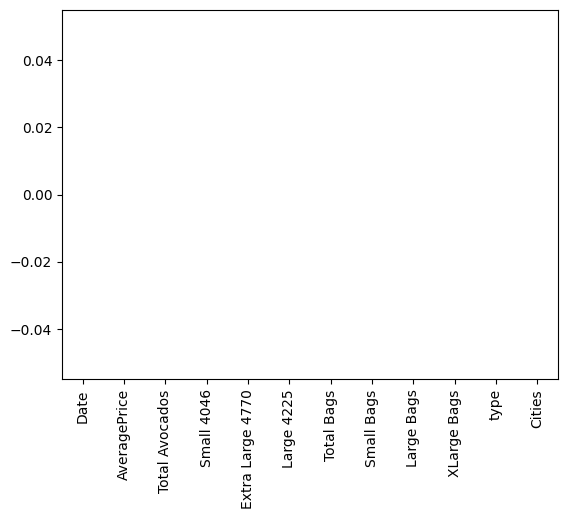

In [4]:
import matplotlib.pyplot as plt

# Check individual values for missing values
print(avocados_sales.isna())

# Check each column for missing values
print(avocados_sales.isna().any())

# Bar plot of missing values by variable
avocados_sales.isna().sum().plot(kind = "bar")

# Show plot
plt.show()

**Removing missing values**

Now that you know there are some missing values in your DataFrame, you have a few options to deal with them. One way is to remove them from the dataset completely. In this exercise, you'll remove missing values by removing all rows that contain missing values.


* Remove the rows of avocados_2016 that contain missing values and store the remaining rows in avocados_complete.
* Verify that all missing values have been removed from avocados_complete. Calculate each column that has NAs and print.

In [5]:
# Remove rows with missing values
avocados_complete = avocados_sales.dropna()

# Check if any columns contain missing values
print(avocados_complete.isna().any())

Date                False
AveragePrice        False
Total Avocados      False
Small 4046          False
Extra Large 4770    False
Large 4225          False
Total Bags          False
Small Bags          False
Large Bags          False
XLarge Bags         False
type                False
Cities              False
dtype: bool


Delightful dropping! Removing observations with missing values is a quick and dirty way to deal with missing data, but this can introduce bias to your data if the values are not missing at random.

**Replacing missing values**

Another way of handling missing values is to replace them all with the same value. For numerical variables, one option is to replace values with 0— you'll do this here. However, when you replace missing values, you make assumptions about what a missing value means. In this case, you will assume that a missing number sold means that no sales for that avocado type were made that week.

In this exercise, you'll see how replacing missing values can affect the distribution of a variable using histograms. You can plot histograms for multiple variables at a time as follows:

dogs[["height_cm", "weight_kg"]].hist()


* A list has been created, cols_with_missing, containing the names of columns with missing values: "small_sold", "large_sold", and "xl_sold".
* Create a histogram of those columns.
* Show the plot.

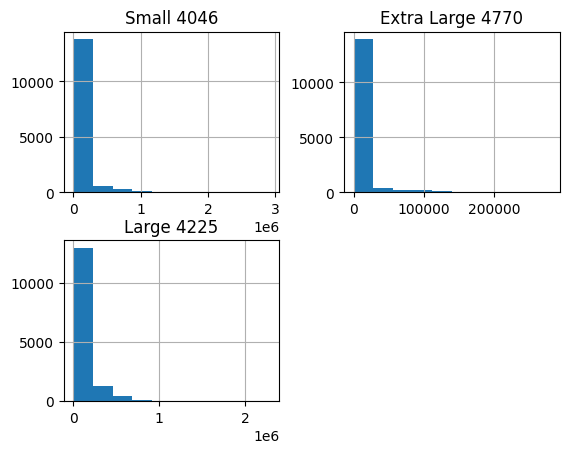

In [6]:
# List the columns with missing values
cols_with_missing = ["Small 4046","Extra Large 4770","Large 4225"]

# Create histograms showing the distributions cols_with_missing
avocados_sales[cols_with_missing].hist()

# Show the plot
plt.show()

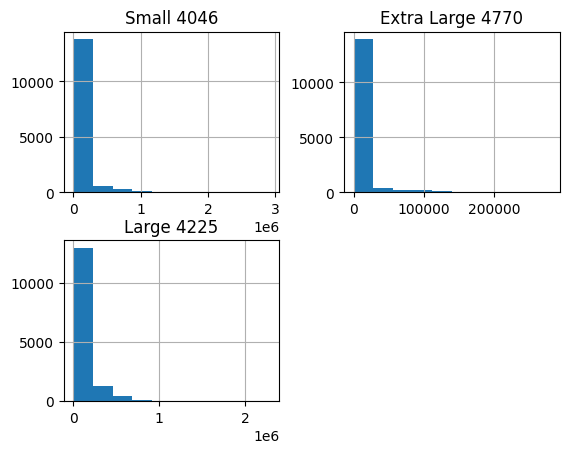

In [9]:

# avocados_sales[cols_with_missing].hist()
# plt.show()

# Fill in missing values with 0
avocados_filled = avocados_sales.fillna(0)

# Create histograms of the filled columns
avocados_filled[cols_with_missing].hist()

# Show the plot
plt.show()

# List of dictionaries

You recently got some new avocado data from 2019 that you'd like to put in a DataFrame using the list of dictionaries method. Remember that with this method, you go through the data row by row.

date	small_sold	large_sold

"2019-11-03"	10376832	7835071

"2019-11-10"	10717154	8561348


* Create a list of dictionaries with the new data called avocados_list.
* Convert the list into a DataFrame called avocados_2019.
* Print your new DataFrame.




In [1]:
import pandas as pd

# Create a list of dictionaries with new data
avocados_list = [
    {"date": "2019-11-03", "small_sold":10376832 , "large_sold": 7835071},
    {"date": "2019-11-10","small_sold": 10717154, "large_sold": 8561348},
]

# Convert list into DataFrame
avocados_2019 = pd.DataFrame(avocados_list)
# Print the new DataFrame
print(avocados_2019)

         date  small_sold  large_sold
0  2019-11-03    10376832     7835071
1  2019-11-10    10717154     8561348


**Dictionary of lists**

Some more data just came in! This time, you'll use the dictionary of lists method, parsing the data column by column.



* Create a dictionary of lists with the new data called avocados_dict.
* Convert the dictionary to a DataFrame called avocados_2019.
* Print your new DataFrame.

In [2]:
# Create a dictionary of lists with new data
avocados_dict = {
  "date": ["2019-11-17", "2019-12-01"],
  "small_sold": [10859987, 	9291631 ],
  "large_sold": [7674135, 6238096]
}

# Convert dictionary into DataFrame
avocados_2019 = pd.DataFrame(avocados_dict)

# Print the new DataFrame
print(avocados_2019)

         date  small_sold  large_sold
0  2019-11-17    10859987     7674135
1  2019-12-01     9291631     6238096


Delightful dictionary-of-lists usage! The list-of-dictionaries method creates DataFrames column-by-column.

**CSV to DataFrame**

You work for an airline, and your manager has asked you to do a competitive analysis and see how often passengers flying on other airlines are involuntarily bumped from their flights. You got a CSV file (airline_bumping.csv) from the Department of Transportation containing data on passengers that were involuntarily denied boarding in 2016 and 2017, but it doesn't have the exact numbers you want. In order to figure this out, you'll need to get the CSV into a pandas DataFrame and do some manipulation!

* Read the CSV file "airline_bumping.csv" and store it as a DataFrame called airline_bumping.
* Print the first few rows of airline_bumping.
* For each airline group, select the nb_bumped, and total_passengers columns, and calculate the sum (for both years). Store this as airline_totals.
* Create a new column of airline_totals called bumps_per_10k, which is the number of passengers bumped per 10,000 passengers in 2016 and 2017.
* Print airline_totals to see the results of your manipulations.

In [ ]:
# From previous steps
airline_bumping = pd.read_csv("airline_bumping.csv")
print(airline_bumping.head())
airline_totals = airline_bumping.groupby("airline")[["nb_bumped", "total_passengers"]].sum()
airline_totals["bumps_per_10k"] = airline_totals["nb_bumped"] / airline_totals["total_passengers"] * 10000

# Print airline_totals
print(airline_totals)

DataFrame to CSV
You're almost there! To make things easier to read, you'll need to sort the data and export it to CSV so that your colleagues can read it.

pandas as pd has been imported for you.


* Sort airline_totals by the values of bumps_per_10k from highest to lowest, storing as airline_totals_sorted.
* Print your sorted DataFrame.
* Save the sorted DataFrame as a CSV called "airline_totals_sorted.csv".